# Analysis of Remarks made by DoD on Films to find the various support provided by DoD to filmmakers.

Using [Spacy NER](https://spacy.io/api/entityrecognizer).

To look at the various types of support provided by the DoD, we use the Named Entity Recognition (NER) on the remarks made by DoD while deciding on assistance to the films. We shall use a pre-trained NER model available on spaCy/NLTK to identify the entities relating to
- EVENT,
- GPE (Countries, cities, states)
- FAC (buildings, airports, highways, bridges, etc.),
- LOC (mountain ranges, bodies of water),
- ORG (companies, agencies, institutions), and 
- PRODUCT (objects, vehicles, food, etc.) tags. 

These tags will help us to annotate the text with its properties and as the DoD could provide support in terms of personnel, equipment, and locations these tags will identify such entries from the text.

In [1]:
# import libraries
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")

Read the final aggregated movie data with additional information, we will only use the columns of Title, status, Media Type, Remarks and plot.

In [2]:
col_list = ['Title', 'IMDB_ID', 'Status', 'Media Type', 'Remarks']
full_film_data = pd.read_csv("../data/with_additional_data/military_hollywood_with_additional_data.csv", usecols = col_list)
made_film_data = full_film_data.loc[full_film_data['IMDB_ID'] != "Never Made"]
made_film_data.head()

,Title,IMDB_ID,Status,Media Type,Remarks
1,"1,000 MEN AND A BABY",tt0133231,APP,TV,VERY POSITIVE DEPICTION OF NAVY IN THIS KOREAN...
3,24,tt0502209,APP,TV,APPROVED FILMING FOR ONE DAY WITH TWO MARINE C...
4,3RD DEGREE,tt0098469,APP,TV,PERSONNEL APPEARED ON THIS GAME SHOW AT THE EX...
5,50/50,tt1306980,DEN,FILM,NEVER WAS OFFICIALLY SUBMITTED TO DOD. IT WAS ...
6,55 DAYS AT PEKING,tt0056800,OTH,FILM,PERIOD PIECE ABOUT MARINES IN CHINA DURING THE...


Creating the Spacy Pipeline

In [3]:
nlp = spacy.load('en_core_web_trf')

## Analysis of entities in the remarks of movies that have received full support from the Department of Defense

Select the movies and films that have been approved.

In [4]:
# Take a subset of approved and denied movies
array = ['APP']
dod_app_subset = made_film_data.loc[made_film_data['Status'].isin(array)]
# lower casing the textual fields
dod_app_subset["Remarks"] = dod_app_subset["Remarks"].astype(str).apply(lambda x: x.lower())
dod_app_subset

,Title,IMDB_ID,Status,Media Type,Remarks
1,"1,000 MEN AND A BABY",tt0133231,APP,TV,very positive depiction of navy in this korean...
3,24,tt0502209,APP,TV,approved filming for one day with two marine c...
4,3RD DEGREE,tt0098469,APP,TV,personnel appeared on this game show at the ex...
11,ABOVE AND BEYOND,tt0044324,APP,FILM,story of paul tibbetts and the atomic bomb mis...
12,ABOVE THE CLOUDS,tt0024811,APP,FILM,"navy provided use of battleships, submarines, ..."
...,...,...,...,...,...
849,WINGS OF EAGLES,tt0051198,APP,FILM,"story of early navy aviator, spig wead. after ..."
850,WITHOUT GLORY,NaN,APP,FILM,approved by the department since it was based ...
853,X-15,tt0055627,APP,FILM,airforce and nasa provided full cooperation on...
855,"YOUNG LIONS, THE",tt0052415,APP,FILM,pentagon and state department went through lon...


Join all the remarks into a single string to make it into a document on which entity counting takes place.

In [5]:
app_remarks = nlp(''.join(str(dod_app_subset.Remarks.tolist())))

*app_remarks* contains the tokens of various pipelines applied through nlp on the remarks of support approved films. We shall take the recognized entities using `ent` attribute. Then we create a dictionary with key as the entity label and value as a list of the text itself.

In [6]:
dod_app_remark_entities = {}

for token in app_remarks.ents:
    if token.label_ not in dod_app_remark_entities:
        dod_app_remark_entities[token.label_] = []
    dod_app_remark_entities[token.label_].append(token.text)

In [7]:
def plot_entity_count(entity_dict, entity_label, minimum_count=1, figsize=(10,8)):
    """
    Function to plot the count of the entities in a bar plot.
    entity_dict: A dictionary of entity as key and list of tuples of texts and the counts that are recognized as that entity as values.
    entity_label: The key of the dictionary whose values are to be plotted.
    minimum_count: The minimum number of times an entity should be present to be in plot.
    figsize: The size of the plot
    """
    plt.rcParams["figure.figsize"] = figsize
    label_counter = Counter(entity_dict[entity_label])
    label_counts = [(k, c) for k, c in label_counter.items() if c >= minimum_count]
    df_label = pd.DataFrame(label_counts, columns=['text', 'count'])
    df_label.sort_values(by='count').plot.barh(x='text', y='count', title=entity_label, figsize=(10,10))
    plt.show()

In [8]:
def plot_entity_cloud(entity_dict, entity_label, minimum_count=1, figsize=(10,8)):
    """
    Function to plot the entities as wordcloud plot.
    entity_dict: A dictionary of entity as key and list of tuples of texts and the counts that are recognized as that entity as values.
    entity_label: The key of the dictionary whose values are to be plotted.
    minimum_count: The minimum number of times an entity should be present to be in plot.
    figsize: The size of the plot
    """
    plt.rcParams["figure.figsize"] = figsize
    # Join the entities together.
    long_string = ','.join(entity_dict[entity_label])
    # Create a WordCloud object
#     wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud = WordCloud(background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS)
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    wordcloud.to_image()
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Wordcloud of Label "{}"'.format(entity_label))
    plt.show()

### Analysis of EVENT entities

EVENT represents the Named hurricanes, battles, wars, sports events etc.

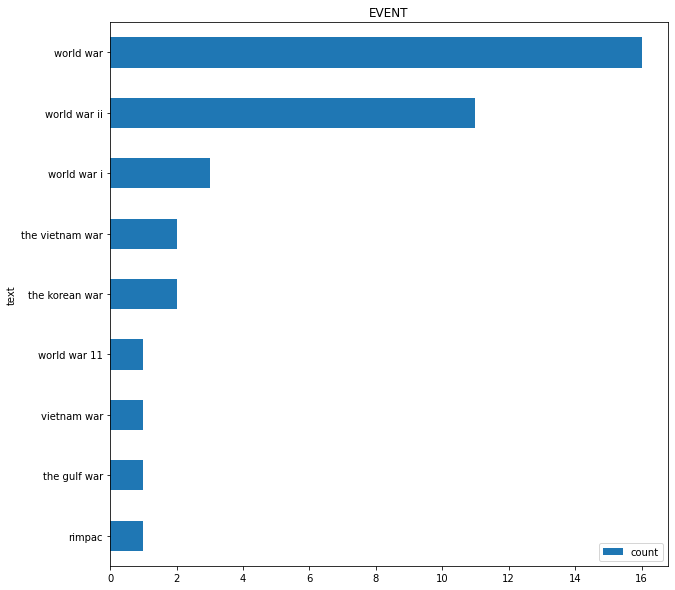

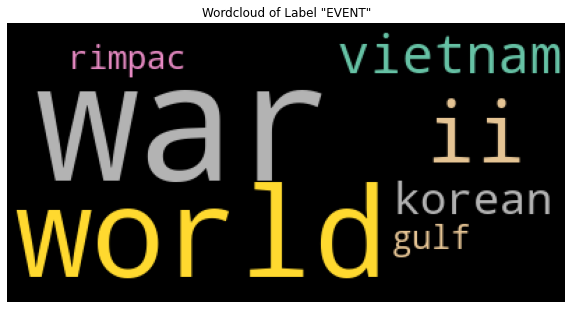

In [9]:
plot_entity_count(dod_app_remark_entities, "EVENT", minimum_count=1)
plot_entity_cloud(dod_app_remark_entities, "EVENT", minimum_count=1)

#### Interpretation of the analysis of EVENT entities

In consistence with the previous analysis of remarks using scattertext, major of the events discussed in the supported films are world war (ii), Vietnam, Korea, Gulf War. RIMPAC, the Rim of the Pacific Exercise, is the world's largest international maritime warfare exercise. For the movie `Battleship`, DoD allowed the makers to film the 2010 RIMPAC exercise for the film.

### Analysis of GPE entities

GPE represents Countries, cities, states

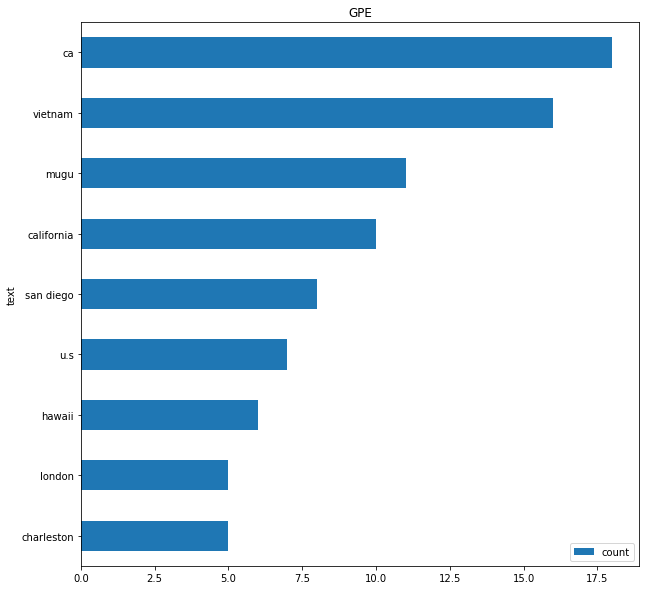

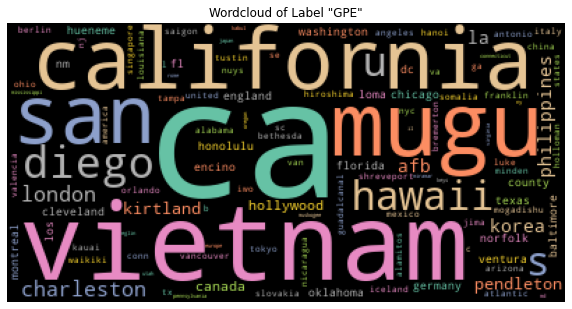

In [10]:
plot_entity_count(dod_app_remark_entities, "GPE", minimum_count=5)
plot_entity_cloud(dod_app_remark_entities, "GPE", minimum_count=1)

#### Interpretation of the analysis of GPE entities

_GPE_ is Geopolitical Entity like countries, cities and state. On one hand, they will indicate the locations that were discussed in the movie, for example, Vietnam, Korea and on the other, we see the location of places that were used for filming. The most important location is mugu, ca/california. Mugu was a former US Navy air station that operated from 1942 to 2000 in California. In 2000, it merged with Port Hueneme. This suggests that one of the keys supports provided by the DoD are locations to shoot the films. The other major locations are San Diego and Hawaii where the US has a Marine Corps Recruit Depot and the U.S. Pacific Fleet, the world's largest naval command respectively. These are followed by Charleston air force base and Marine Corps Base Camp at Pendleton. London here appears for two reasons: one some movies use london as their backdrop while others have filmed at New London submarine museum.

### Analysis of FAC entities

FAC represents the buildings, airports, highways, bridges etc.

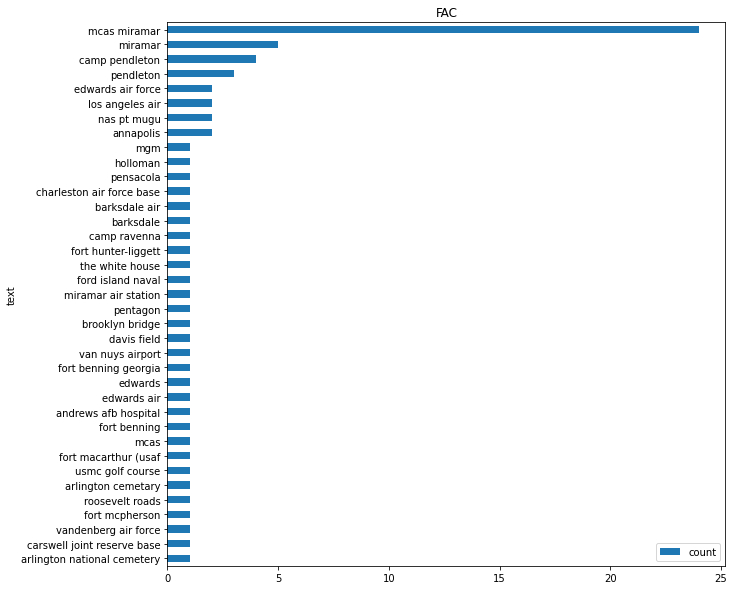

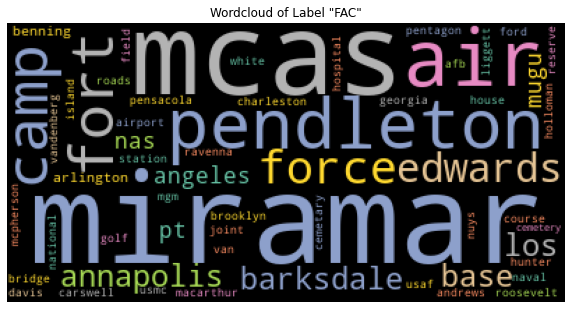

In [11]:
plot_entity_count(dod_app_remark_entities, "FAC", minimum_count=1)
plot_entity_cloud(dod_app_remark_entities, "FAC", minimum_count=1)

#### Interpretation of the analysis of FAC entities

_FAC_ represents building, airports, highways, bridges etc. This can be seen in conjunction with GPE to get the unit what was there at the locations provided by DoD. 

**Combine FAC and GPE to show the support provided in terms of locations**

### Analysis of LOC entities

LOC represents the Non-GPE locations, mountain ranges, bodies of water.

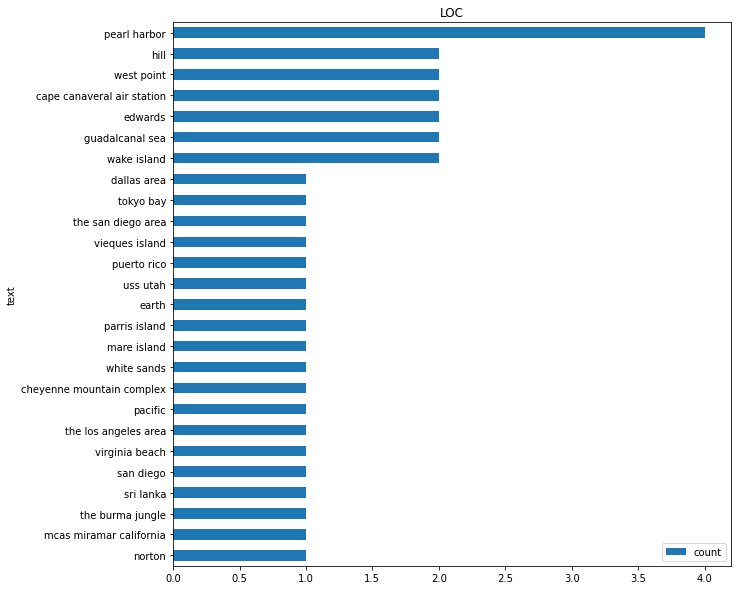

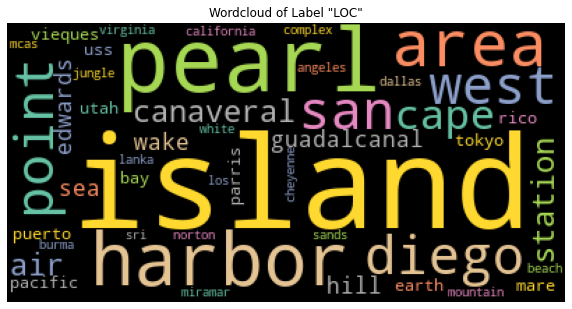

In [12]:
plot_entity_count(dod_app_remark_entities, "LOC", minimum_count=1)
plot_entity_cloud(dod_app_remark_entities, "LOC", minimum_count=1)

#### Interpretation of the analysis of LOC entities

_LOC_ represents the Non-GPE locations, mountain ranges, bodies of water. Similar to FAC, looking at these entities in conjunction with GPE and FAC will inform us about the location provided for shooting.

### Analysis of ORG entities

ORG represents the companies, agencies, institutions etc.

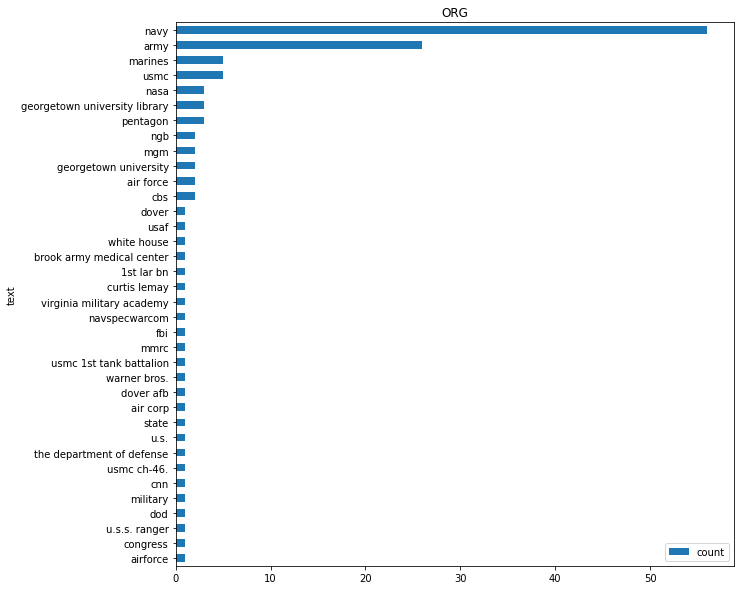

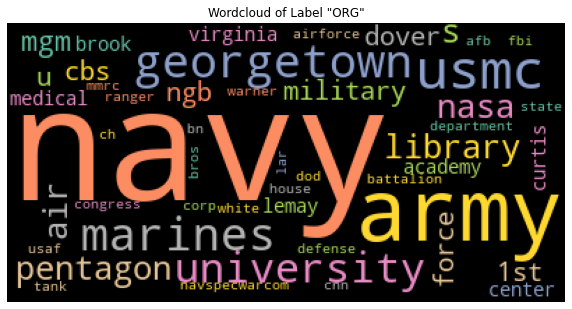

In [13]:
plot_entity_count(dod_app_remark_entities, "ORG", minimum_count=1)
plot_entity_cloud(dod_app_remark_entities, "ORG", minimum_count=1)

#### Interpretation of the analysis of ORG entities

_ORG_ represents the companies, agencies, institutions etc. This indicates the agencies the filmmakers approached for support. It can be seen that the Navy and the army assisted in the films that have received support followed by marines, USMC. A probable reason for this is the cost of creating Navy sets and obtaining army fighting stories.

### Analysis of PRODUCT entities

PRODUCT represents the Objects, vehicles, food, etc. (Not Services)

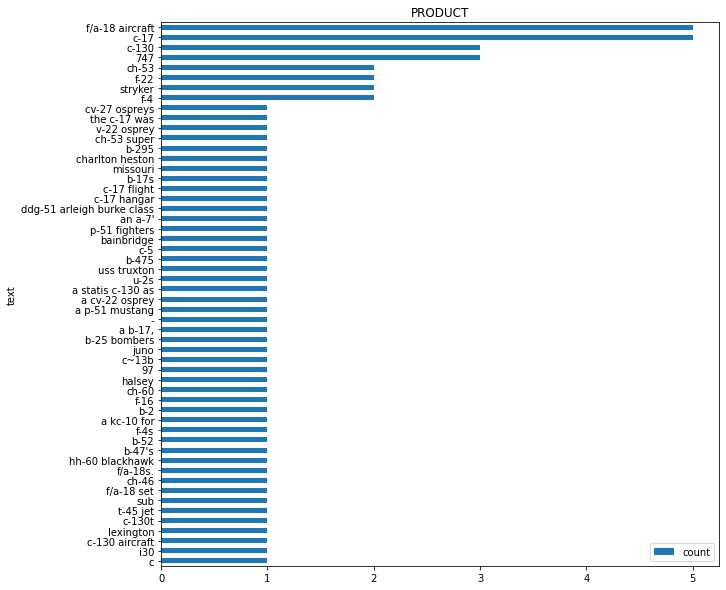

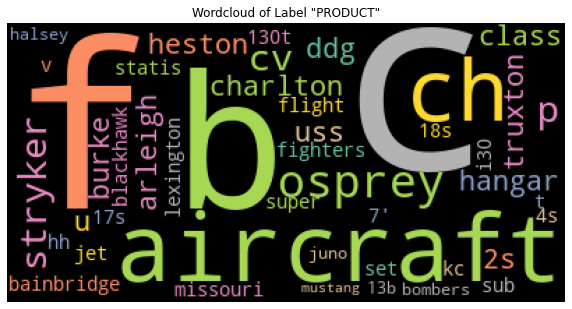

In [14]:
plot_entity_count(dod_app_remark_entities, "PRODUCT", minimum_count=1, figsize=(15,10))
plot_entity_cloud(dod_app_remark_entities, "PRODUCT", minimum_count=1)

#### Interpretation of the analysis of PRODUCT entities

_PRODUCT_ represents the objects, vehicles, food etc. This indicates the product/object support the filmmakers approached for support or were provided by the DoD. The letters f,c and b occupy a major portion and these indicate the fighter jets of the US airforce that were provided by DoD. This is followed by Navy products like battleships and aircraft carriers (through the words uss, mustang). From the Army side, we see black hawk, stryker.

## Analysis of entities in the remarks of movies that have not received support from the Department of Defense

Select the movies and films that have been denied.

In [15]:
# Take a subset of approved and denied movies
array = ['DEN']
dod_den_subset = made_film_data.loc[made_film_data['Status'].isin(array)]
# lower casing the textual fields
dod_den_subset["Remarks"] = dod_den_subset["Remarks"].astype(str).apply(lambda x: x.lower())
dod_den_subset

,Title,IMDB_ID,Status,Media Type,Remarks
5,50/50,tt1306980,DEN,FILM,never was officially submitted to dod. it was ...
9,A MIDNIGHT CLEAR,tt0102443,DEN,FILM,declined assistance (request for ww ii facilit...
17,AFTERBURN: THE JANET HARDUVEL STORY,tt0103626,DEN,TV,the department of the air force and dod decide...
23,AIR WOLF,tt0507183,DEN,TV,air force advised production that assistance w...
31,ALOHA,tt1243974,DEN,FILM,approved access to former housing area at join...
...,...,...,...,...,...
828,WAR GAMES,tt0086567,DEN,FILM,the theme of the film goes against everything ...
829,WAR HUNT,tt0056675,DEN,FILM,small story about korea. soldier steals off in...
833,WEEKEND WAR,tt0096429,DEN,TV,very unrealistic and unfactual about the natio...
841,WHO'S LOOKING AFTER THE BABY,NaN,DEN,FILM,the film was denied because it had nothing at ...


Join all the remarks into a single string to make it into a document on which entity counting takes place.

In [16]:
den_remarks = nlp(''.join(str(dod_den_subset.Remarks.tolist())))

*den_remarks* contains the tokens of various pipelines applied through nlp on the remarks of support denied films. We shall take the recognized entities using `ent` attribute. Then we create a dictionary with key as the entity label and value as a list of the text itself.

In [17]:
dod_den_remark_entities = {}

for token in den_remarks.ents:
    if token.label_ not in dod_den_remark_entities:
        dod_den_remark_entities[token.label_] = []
    dod_den_remark_entities[token.label_].append(token.text)

### Analysis of EVENT entities

EVENT represents the Named hurricanes, battles, wars, sports events etc.

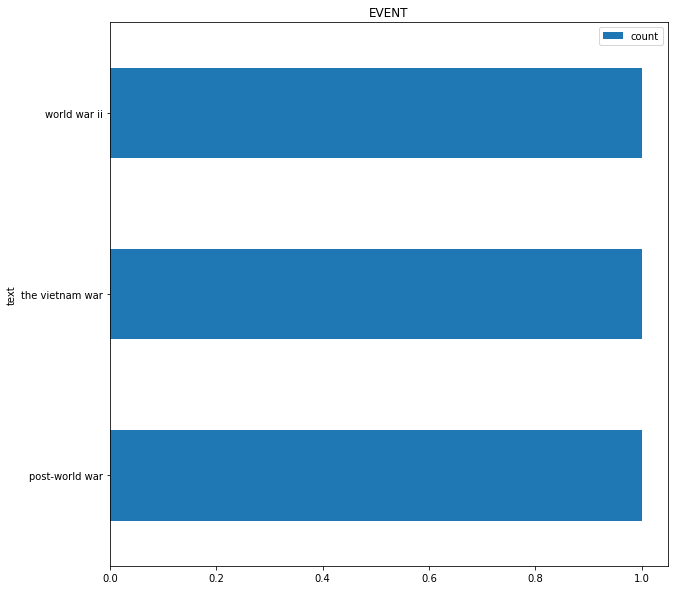

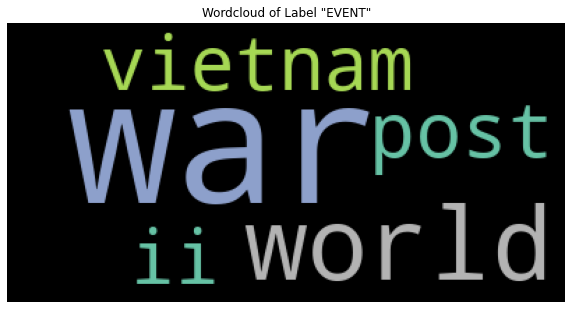

In [18]:
plot_entity_count(dod_den_remark_entities, "EVENT", minimum_count=1)
plot_entity_cloud(dod_den_remark_entities, "EVENT", minimum_count=1)

#### Interpretation of the analysis of EVENT entities

Most of the denied films also dealt with the world war and the Vietnam war.

### Analysis of GPE entities

GPE represents Countries, cities, states

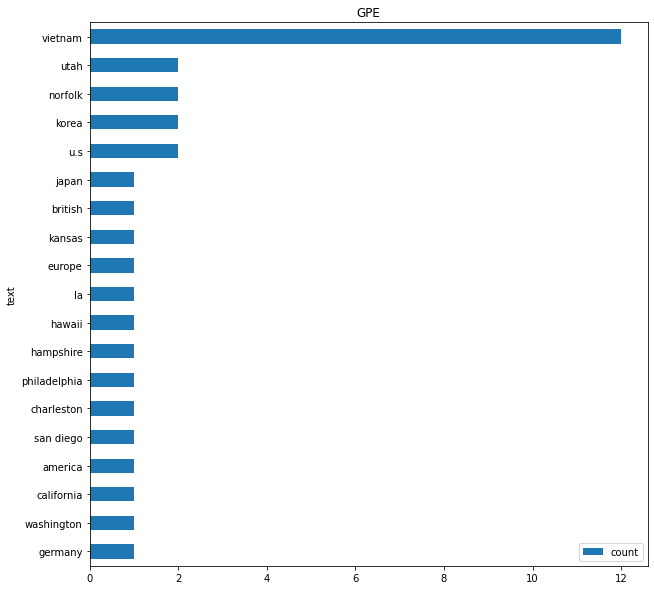

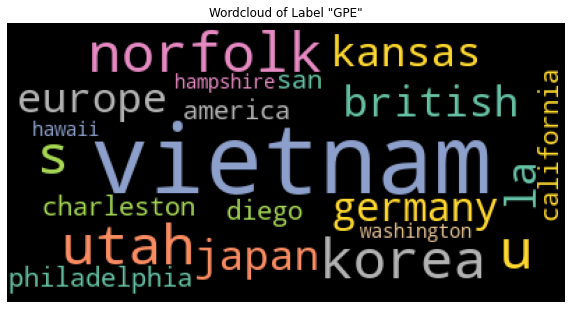

In [19]:
plot_entity_count(dod_den_remark_entities, "GPE", minimum_count=1)
plot_entity_cloud(dod_den_remark_entities, "GPE", minimum_count=1)

#### Interpretation of the analysis of GPE entities

see the interpretation of LOC

### Analysis of FAC entities

FAC represents the buildings, airports, highways, bridges etc.

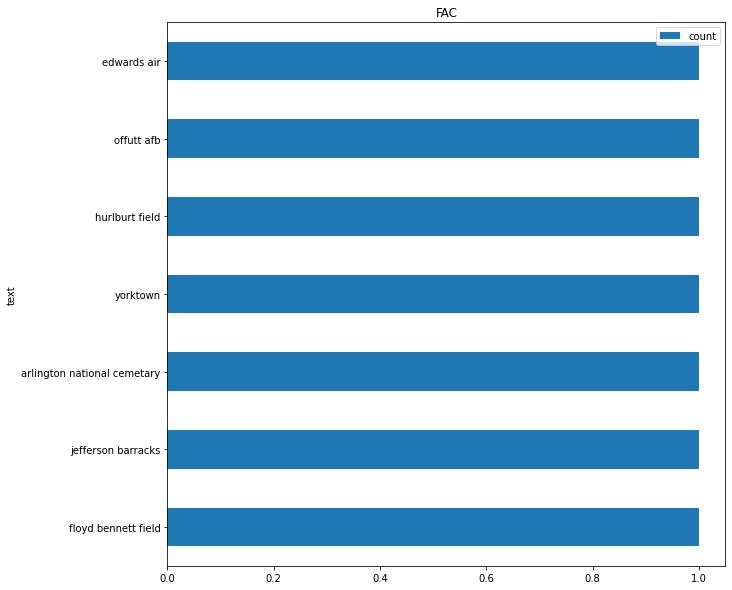

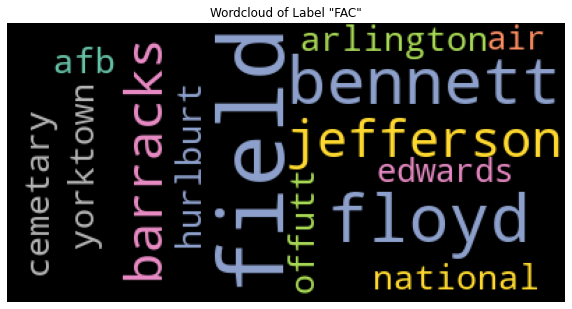

In [20]:
plot_entity_count(dod_den_remark_entities, "FAC", minimum_count=1)
plot_entity_cloud(dod_den_remark_entities, "FAC", minimum_count=1)

#### Interpretation of the analysis of FAC entities

See the interpretation of LOC

### Analysis of LOC entities

LOC represents the Non-GPE locations, mountain ranges, bodies of water.

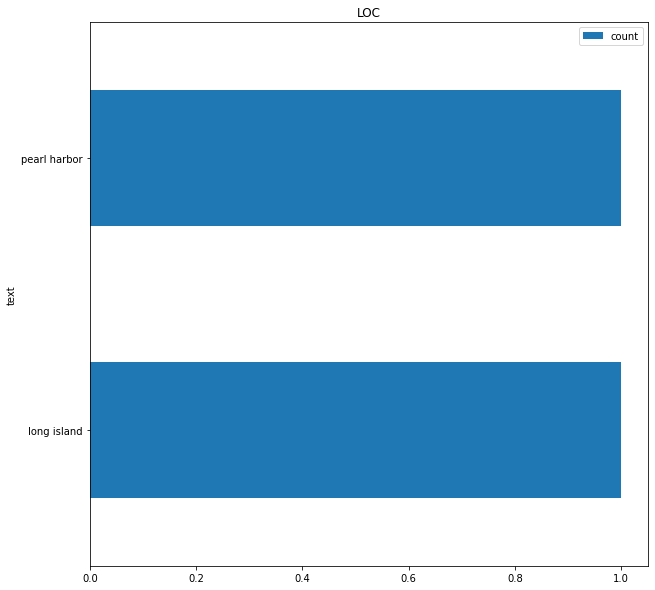

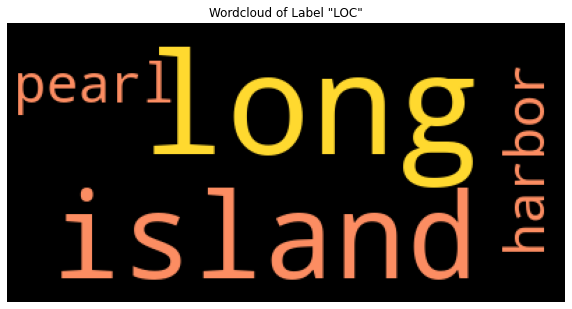

In [21]:
plot_entity_count(dod_den_remark_entities, "LOC", minimum_count=1)
plot_entity_cloud(dod_den_remark_entities, "LOC", minimum_count=1)

#### Interpretation of the analysis of LOC entities

As these films were not supported, the GPE, FAC and LOC entities represent the places where the filmmakers could have requested for filming. However, the entities in GPE also represent the locations that were mentioned in the script. Nevertheless, the major locations present here are Peral harbour (Hawaii naval base), Arlington (National Cemetery).

### Analysis of ORG entities

ORG represents the companies, agencies, institutions etc.

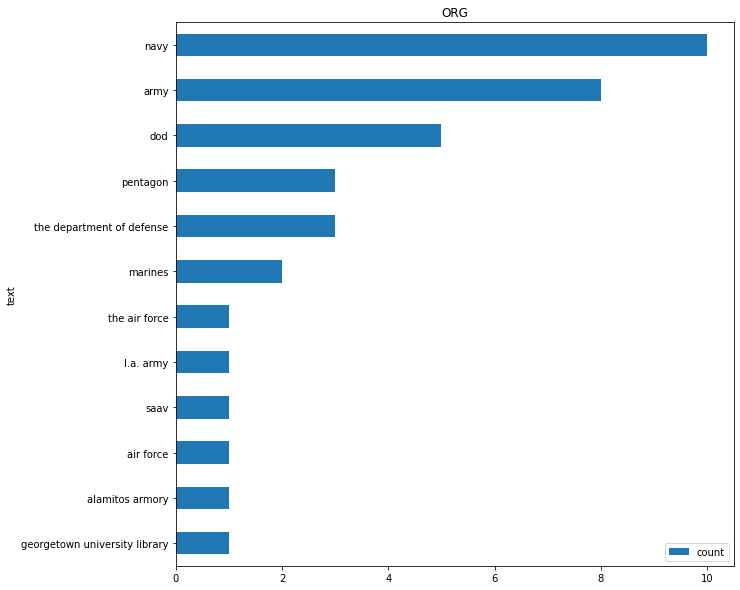

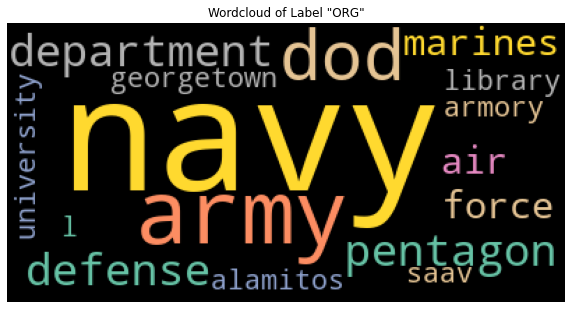

In [22]:
plot_entity_count(dod_den_remark_entities, "ORG", minimum_count=1)
plot_entity_cloud(dod_den_remark_entities, "ORG", minimum_count=1)

#### Interpretation of the analysis of ORG entities

The organisations more or less remain the same as this mostly indicates the agencies that have declined the assistance.

### Analysis of PRODUCT entities

PRODUCT represents the Objects, vehicles, food, etc. (Not Services)

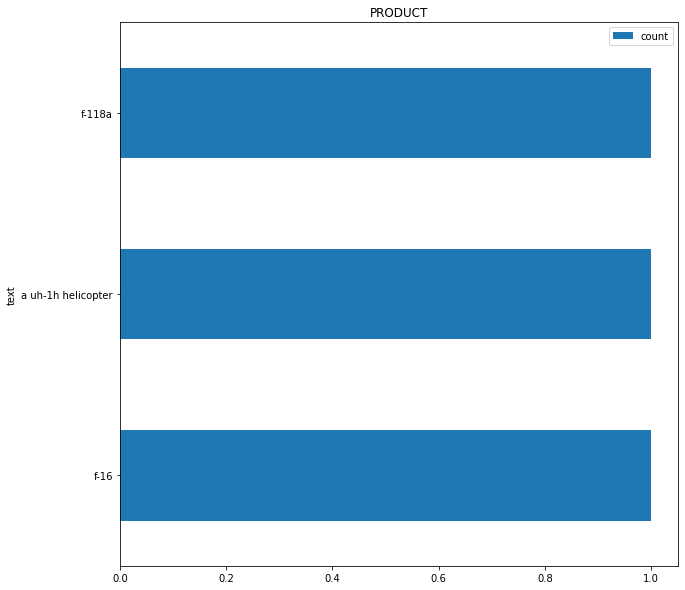

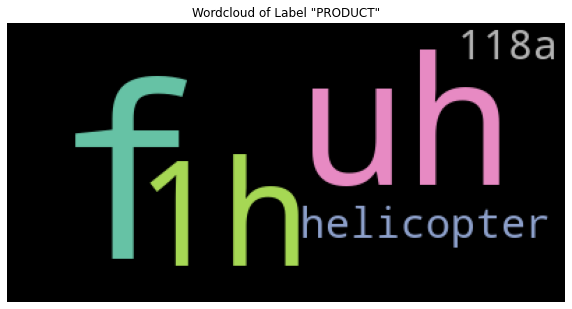

In [23]:
plot_entity_count(dod_den_remark_entities, "PRODUCT", minimum_count=1)
plot_entity_cloud(dod_den_remark_entities, "PRODUCT", minimum_count=1)

#### Interpretation of the analysis of PRODUCT entities

The request for helicopters and fighter jets is common here as well.

## Analysis of entities in the remarks of movies that have received limited support from the Department of Defense

Select the movies and films that have limited status.

In [24]:
# Take a subset of approved and denied movies
array = ['LIM']
dod_lim_subset = made_film_data.loc[made_film_data['Status'].isin(array)]
# lower casing the textual fields
dod_lim_subset["Remarks"] = dod_lim_subset["Remarks"].astype(str).apply(lambda x: x.lower())
dod_lim_subset

,Title,IMDB_ID,Status,Media Type,Remarks
8,A FEW GOOD MEN,tt0104257,LIM,FILM,"inaccurate, negative portravals of marines. pr..."
37,AMERICAN GUERRILLA IN THE PHILIPPINES,tt0042195,LIM,FILM,navy provided a ship for a brief sequence at t...
41,ANCHORS AWAY,tt0037514,LIM,FILM,navy provided locations and ships as backgroun...
66,BAMBOO SAUCER,tt0062704,LIM,FILM,convoluted science fiction story about a flyin...
68,BATAAN,tt0035664,LIM,FILM,classic army story about fall of bataan. group...
...,...,...,...,...,...
792,TOUR OF DUTY,tt0732287,LIM,TV,air force provided use of f-4 tock footage. ep...
812,UNAUTHORIZED BIO OF JANE FONDA,tt14114510,LIM,TV,the department agreed authorized the productio...
824,WAITING FOR THE LIGHT,tt0100899,LIM,FILM,stock footage was approved for the film.
851,WOMEN OF VALOR,tt0092236,LIM,TV,approved use of stock footage. film was ouite ...


Join all the remarks into a single string to make it into a document on which entity counting takes place.

In [25]:
lim_remarks = nlp(''.join(str(dod_lim_subset.Remarks.tolist())))

*lim_remarks* contains the tokens of various pipelines applied through nlp on the remarks of limted support films. We shall take the recognized entities using `ent` attribute. Then we create a dictionary with key as the entity label and value as a list of the text itself.

In [26]:
dod_lim_remark_entities = {}

for token in lim_remarks.ents:
    if token.label_ not in dod_lim_remark_entities:
        dod_lim_remark_entities[token.label_] = []
    dod_lim_remark_entities[token.label_].append(token.text)

### Analysis of EVENT entities

EVENT represents the Named hurricanes, battles, wars, sports events etc.

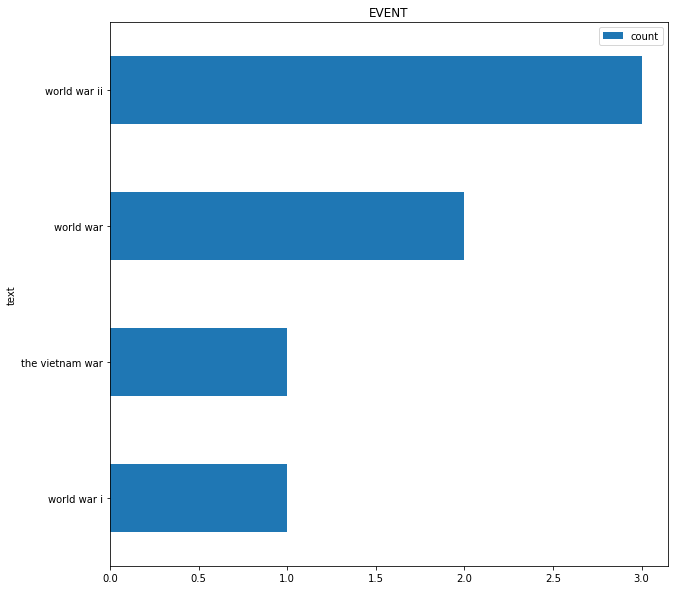

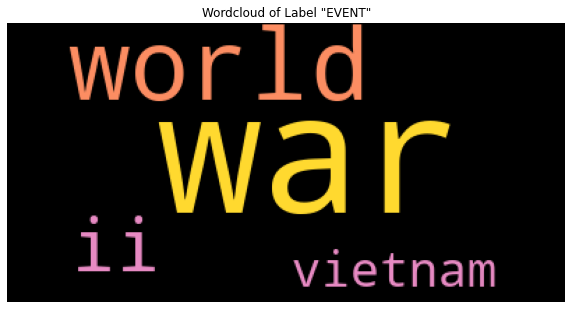

In [27]:
plot_entity_count(dod_lim_remark_entities, "EVENT", minimum_count=1)
plot_entity_cloud(dod_lim_remark_entities, "EVENT", minimum_count=1)

#### Interpretation of the analysis of EVENT entities

Similar to the above two the major events were the world war and the Vietnam war.

### Analysis of GPE entities

GPE represents Countries, cities, states

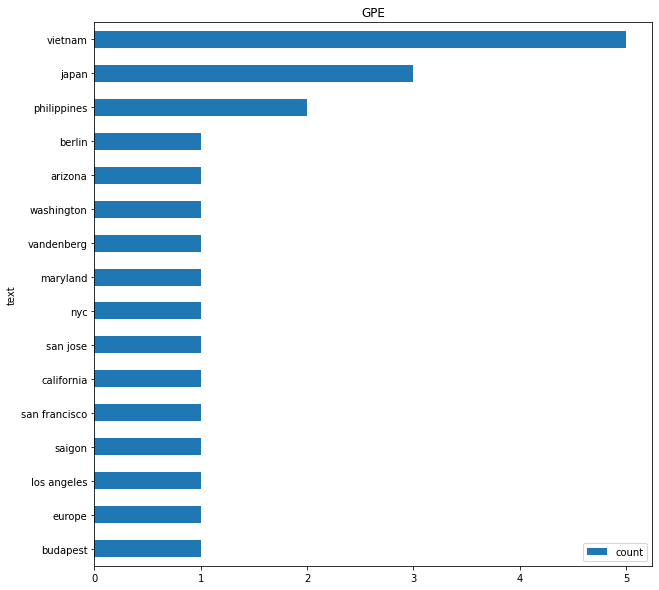

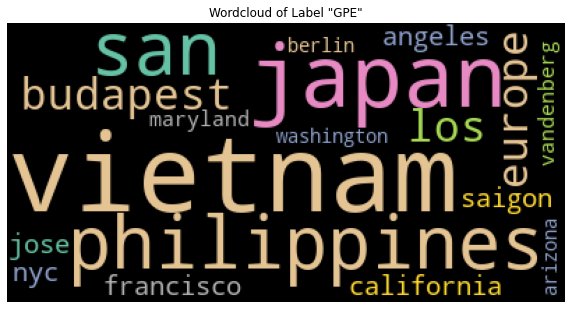

In [28]:
plot_entity_count(dod_lim_remark_entities, "GPE", minimum_count=1)
plot_entity_cloud(dod_lim_remark_entities, "GPE", minimum_count=1)

#### Interpretation of the analysis of GPE entities

These entities tell us the locations where support was requested by the filmmakers.

### Analysis of FAC entities

FAC represents the buildings, airports, highways, bridges etc.

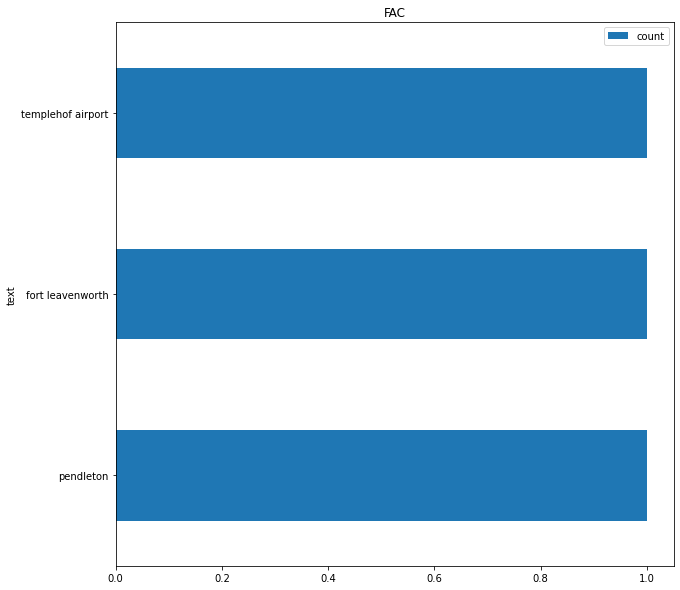

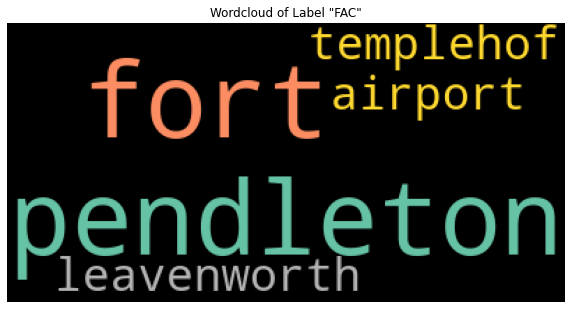

In [29]:
plot_entity_count(dod_lim_remark_entities, "FAC", minimum_count=1)
plot_entity_cloud(dod_lim_remark_entities, "FAC", minimum_count=1)

#### Interpretation of the analysis of FAC entities

See interpretation of LOC

### Analysis of LOC entities

LOC represents the Non-GPE locations, mountain ranges, bodies of water.

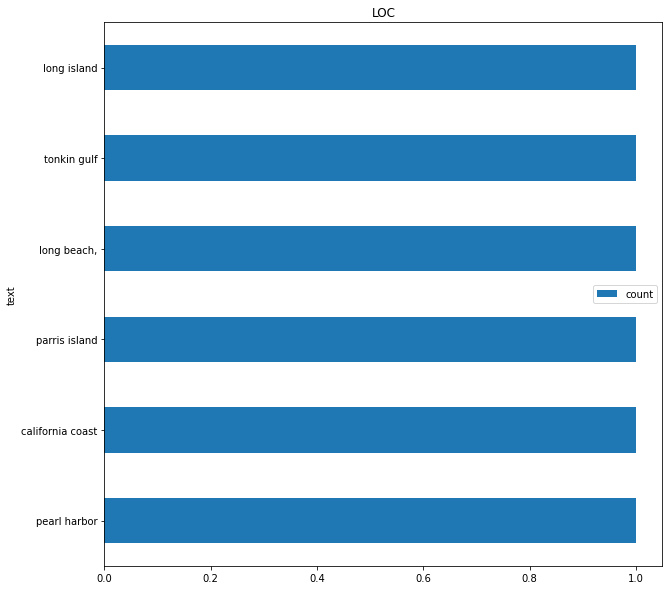

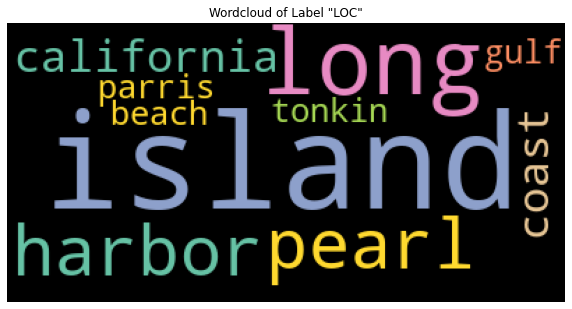

In [30]:
plot_entity_count(dod_lim_remark_entities, "LOC", minimum_count=1)
plot_entity_cloud(dod_lim_remark_entities, "LOC", minimum_count=1)

#### Interpretation of the analysis of LOC entities

Even in the case of partial support, it was mostly the same locations like California, Pearl Harbor.

### Analysis of ORG entities

ORG represents the companies, agencies, institutions etc.

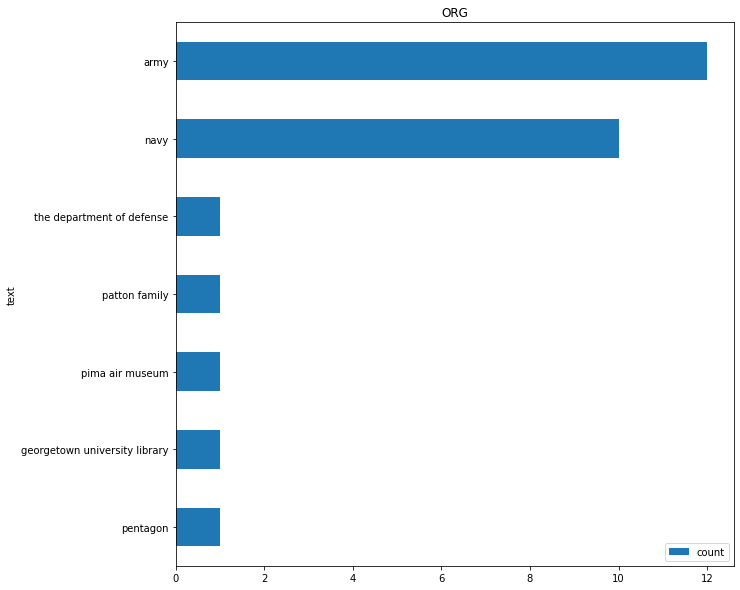

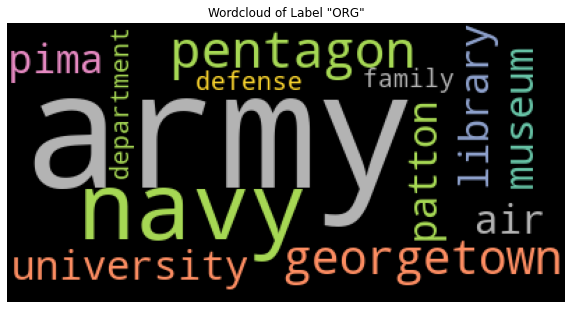

In [31]:
plot_entity_count(dod_lim_remark_entities, "ORG", minimum_count=1)
plot_entity_cloud(dod_lim_remark_entities, "ORG", minimum_count=1)

#### Interpretation of the analysis of ORG entities

Here the army has been giving partial support more than the navy, However, we see a library (at Georgetown University) where the filmmakers could have availed some material for research or footage.

### Analysis of PRODUCT entities

PRODUCT represents the Objects, vehicles, food, etc. (Not Services)

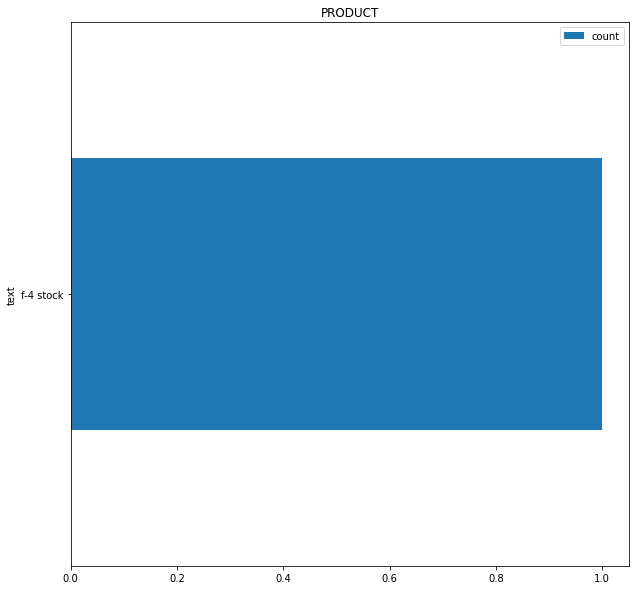

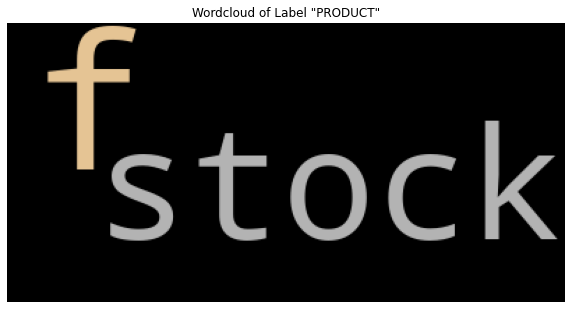

In [32]:
plot_entity_count(dod_lim_remark_entities, "PRODUCT", minimum_count=1)
plot_entity_cloud(dod_lim_remark_entities, "PRODUCT", minimum_count=1)

#### Interpretation of the analysis of PRODUCT entities

The major word here is Stock, indicating the most of the limited support provided by the DoD is in giving the stock footage to the filmmakers.